In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df["target"]=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
x=df.drop(["sepal length (cm)","sepal width (cm)","target"],axis="columns")
x

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Now Using Cluster

In [8]:
km=KMeans(n_clusters=3)
cluster=km.fit_predict(x)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x["cluster"]=cluster
x

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [10]:
df0=x[x["cluster"]==0]
df1=x[x["cluster"]==1]
df2=x[x["cluster"]==2]
df0.head()

,petal length (cm),petal width (cm),cluster
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0


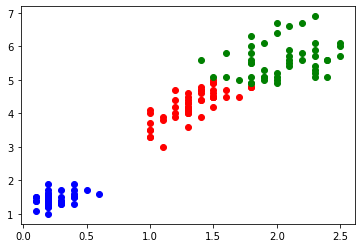

In [11]:
plt.scatter(df0["petal width (cm)"],df0["petal length (cm)"],marker="o",color="red")
plt.scatter(df1["petal width (cm)"],df1["petal length (cm)"],marker="o",color="blue")
plt.scatter(df2["petal width (cm)"],df2["petal length (cm)"],marker="o",color="green")

***We Dont Need MINMAX SCALER because the Petal width and Petal Lenth is not so far in numeric***

In [12]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km=km.fit(x)
    sse.append(km.inertia_)
    

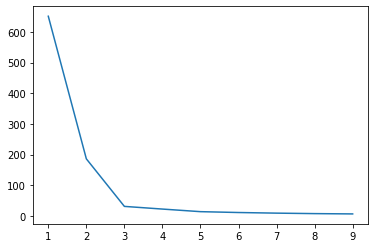

In [13]:
plt.plot(k_range,sse)

In [14]:
km.cluster_centers_

array([[4.10000000e+00, 1.24500000e+00, 2.22044605e-16],
       [1.46200000e+00, 2.46000000e-01, 1.00000000e+00],
       [5.28571429e+00, 2.25714286e+00, 2.00000000e+00],
       [6.60000000e+00, 2.06666667e+00, 2.00000000e+00],
       [4.64400000e+00, 1.50000000e+00, 3.33066907e-16],
       [5.05714286e+00, 1.84285714e+00, 2.00000000e+00],
       [3.41428571e+00, 1.05714286e+00, 0.00000000e+00],
       [5.73750000e+00, 1.73750000e+00, 2.00000000e+00],
       [5.79230769e+00, 2.30000000e+00, 2.00000000e+00]])

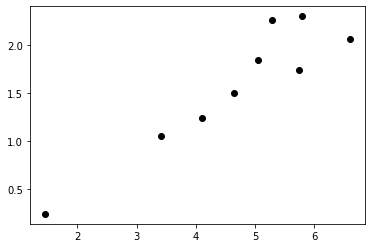

In [16]:
# plt.scatter(df0["petal width (cm)"],df0["petal length (cm)"],marker="o",color="red")
# plt.scatter(df1["petal width (cm)"],df1["petal length (cm)"],marker="o",color="blue")
# plt.scatter(df2["petal width (cm)"],df2["petal length (cm)"],marker="o",color="green")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1],c = 'black', label = 'Centroids')